# Neural Network That Can Read Handwriting
## by- Tamal Majumder
* **[LINKEDIN](https://www.linkedin.com/in/tamal-majumder-4979781a3/)**
* **[GITHUB](https://github.com/t-majumder)**

### Explanation:
* First Load the dataset from keras library
* Then plot the graph of the dataset and from this we can clearly see that the dataset has almost equal amount of data for all the charecters.
* Then we preprocess the dataset (Training and Testing).
* After that we build and train the ML model.
* Then save and load the model using the dataset.
* Now we evaluate the model and plot necessary garphs to look at its accuracy and validate.
* Finally we test the dataset and can see that the model is very accurately predicting the charecters.

In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the dataset

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

# Plotting

<Axes: ylabel='count'>

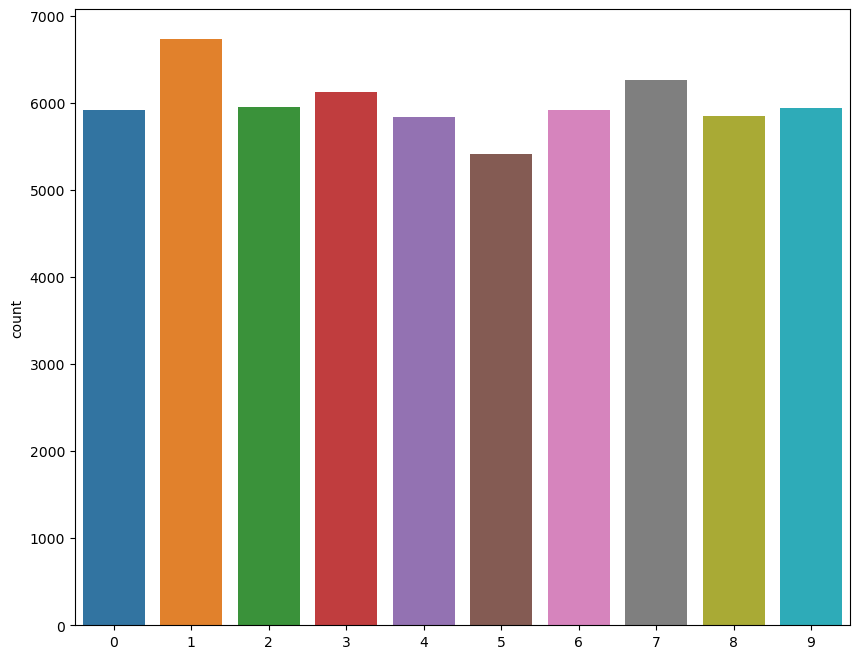

In [5]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train)

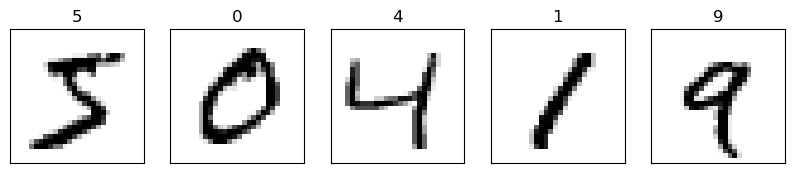

In [6]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Pre-processing the data

In [7]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [9]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

# Training dataset

CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [11]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 82s 48ms/step - loss: 0.2819 - accuracy: 0.9173 - val_loss: 0.0729 - val_accuracy: 0.9825
Epoch 2/10
1688/1688 [==============================] - 81s 48ms/step - loss: 0.1084 - accuracy: 0.9681 - val_loss: 0.1310 - val_accuracy: 0.9725
Epoch 3/10
1688/1688 [==============================] - 78s 46ms/step - loss: 0.0900 - accuracy: 0.9737 - val_loss: 0.1378 - val_accuracy: 0.9755
Epoch 4/10
1688/1688 [==============================] - 77s 46ms/step - loss: 0.0752 - accuracy: 0.9779 - val_loss: 0.0825 - val_accuracy: 0.9832
Epoch 5/10
1688/1688 [==============================] - 76s 45ms/step - loss: 0.0668 - accuracy: 0.9803 - val_loss: 0.0994 - val_accuracy: 0.9837
Epoch 6/10
1688/1688 [==============================] - 76s 45ms/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.0770 - val_accuracy: 0.9865
Epoch 7/10
1688/1688 [==============================] - 76s 45ms/step - loss: 0.0524 - accuracy: 0.9849 - val_loss: 0.1136 -

# Saving and loading the model

In [14]:
model.save('MNproject.h5')

In [15]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

# Evaluating the model

In [16]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 4s 12ms/step - loss: 7.5950 - accuracy: 0.9743
Test Loss 7.5950093269348145
Test Accuracy 0.9743000268936157


# Plotting Training & Validation plots

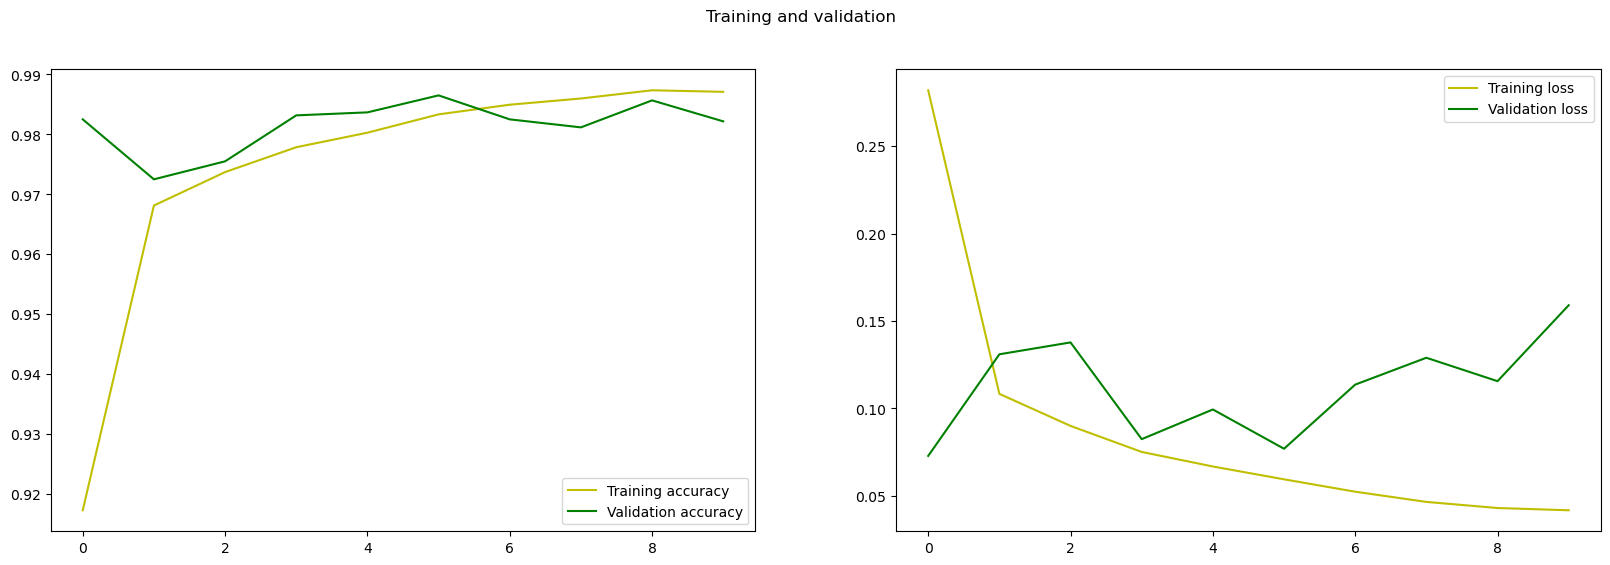

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [18]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 4s 11ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    2,    0,    0,    0,    0,    0,    0,    1],
       [   0, 1087,   16,    5,    0,    0,   12,    5,   10,    0],
       [   0,    0, 1030,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    2, 1005,    0,    1,    0,    0,    2,    0],
       [   0,    0,    0,    0,  968,    0,    3,    0,    8,    3],
       [   0,    0,    1,   29,    0,  822,    1,    2,   37,    0],
       [   2,    0,    0,    0,    3,    8,  922,    0,   23,    0],
       [   0,    0,   14,    5,    0,    0,    0, 1007,    1,    1],
       [   1,    0,    0,    1,    0,    0,    0,    0,  972,    0],
       [   0,    0,    3,    1,    7,    1,    0,    3,   41,  953]])>

Text(95.72222222222221, 0.5, 'Truth')

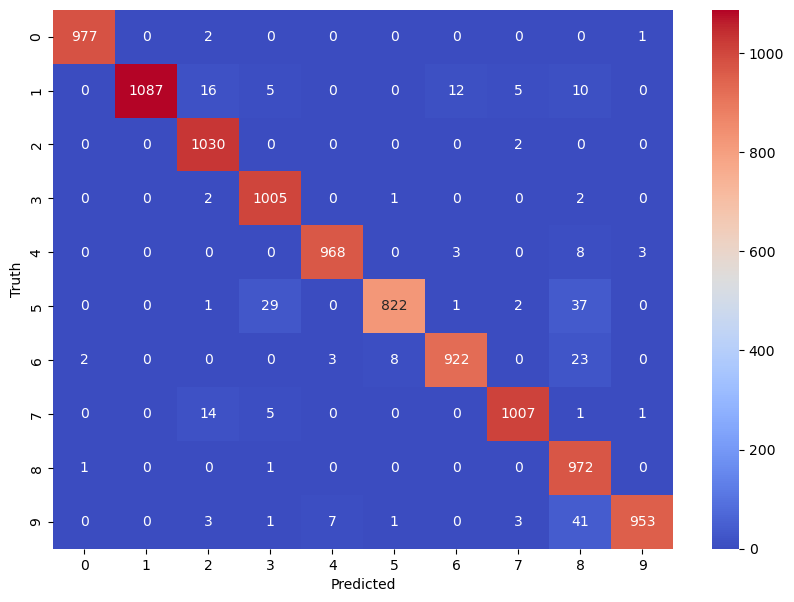

In [19]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Testing the Model

313/313 [==============================] - 3s 11ms/step
Predicted Value:  9
Successful prediction


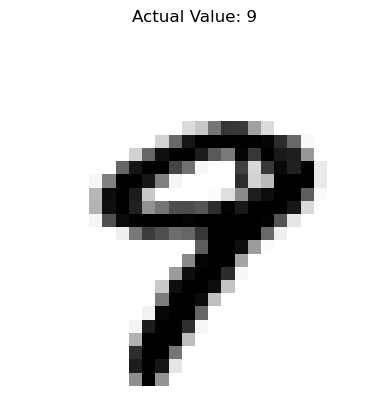

In [25]:
plt.imshow(x_test[9],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[9]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 4s 12ms/step
Predicted Value:  6
Successful prediction


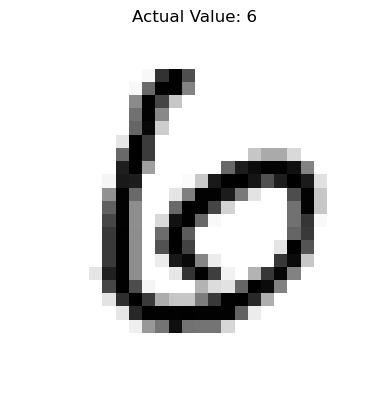

In [33]:
plt.imshow(x_test[11],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[11]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[11]))
if(y_test[11]==(np.argmax(prediction[11]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 4s 11ms/step
Predicted Value:  7
Successful prediction


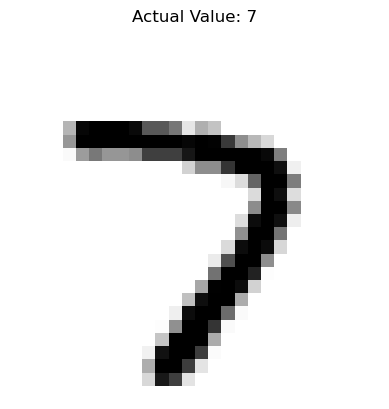

In [40]:
plt.imshow(x_test[17],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[17]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[17]))
if(y_test[17]==(np.argmax(prediction[17]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')